# Comparison of ANN, CNN and RL models

### Sitabja Ukil (17200734) & Anandita Pal (17200262)

This notebook discusses the performance comparison of three different models namely ANN (trained with state vectors), CNN (trained with image dataset) and DeepQLearning RL. The three methods of the player files, responsible to run each model are as follows (The codes to run the models are wrapped inside the below mentioned methods of the corresponding player files) :
<ul>
    <li><b>runLunarLander</b> (To run the ANN model trained using state vectors)
    <li><b>runLunarLanderImages</b> (To run the CNN model trained using images)
    <li><b>runLunarLanderRl</b> (To run the DeepQLearning model trained using Reinforcement Learning)
<ul>

## Imports 

In [1]:
from lunar_lander_ml_states_player import runLunarLander 
from lunar_lander_ml_images_player import runLunarLanderImages  
from lunar_lander_rl_player import runLunarLanderRl

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


## Test Models

We will test the models over a considerable number of episodes and determine the best model based on the rewards obtained. <br>
Let us define the number of episodes to test the models and a dictionary to store the rewards for each model.

In [2]:
number_of_episodes = 200

In [3]:
# For storing the results of the experiment
reward_comparison ={}

### Test: RL model

In [4]:
# Testing the RL model over 200 episodes
reward_rl = runLunarLanderRl(number_of_episodes)

average total reward 204.877215


In [5]:
# Storing the rewards for RL model
reward_comparison['rl']= reward_rl;

### Test: CNN model

In [6]:
# Testing the CNN model over 200 episodes
reward_cnn = runLunarLanderImages(number_of_episodes)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
average total reward -304.632017718


In [7]:
# Storing the rewards for CNN model
reward_comparison['cnn'] = reward_cnn

### Test: ANN model

In [8]:
# Testing the ANN model over 200 episodes
reward_ann = runLunarLander(number_of_episodes)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
average total reward 205.21501677


In [9]:
# Storing the rewards for CNN model
reward_comparison['ann'] = reward_ann

## Compare the model performances

The following plot shows rewards obtained from the three models over 200 episodes.

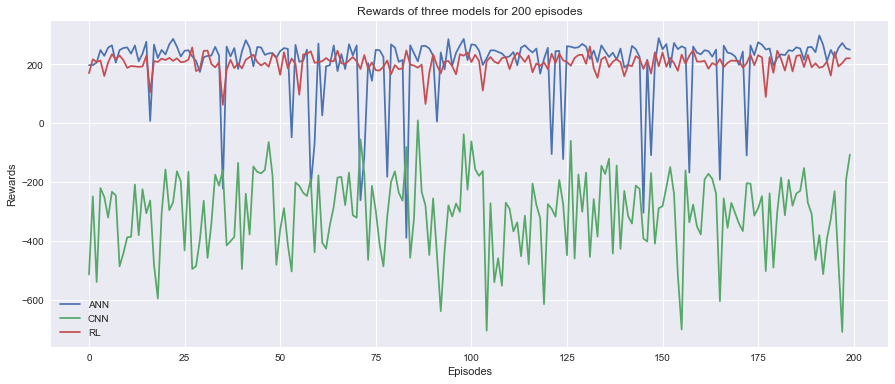

In [10]:
# Plotting the rewards
plt.figure(figsize=(15,6))
plt.plot(reward_comparison['ann'])
plt.plot(reward_comparison['cnn'])
plt.plot((reward_comparison['rl']))
plt.legend(['ANN','CNN','RL'])
plt.title("Rewards of three models for 200 episodes")
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

<b>Observations : </b><br>
<ul>
<li>CNN has given the minimum rewards with a lot of fluctuations.</li>
<li>ANN has shown a better performance than CNN, giving higher rewards, but again the rewards aren't stable.</li>
<li>RL has shown the best performance, giving higher and more stable rewards than both ANN and CNN.</li>
</ul>

This can be explained better using the visualizations below.

In [11]:
# Table showing statistical summary of the experiments
import pandas as pd
comparsion_df  = pd.DataFrame.from_dict(reward_comparison)
comparsion_df.describe()

,ann,cnn,rl
count,200.000000,200.000000,200.000000
mean,205.215017,-304.632018,204.877215
std,116.814438,133.837882,29.393885
min,-388.015884,-707.360022,62.828000
25%,214.040244,-396.449762,192.087750
50%,241.724242,-282.169723,208.335500
75%,257.309186,-203.691634,222.285000
max,298.108310,10.238478,260.866000


<b>Observations : </b>
<br><br>
The mean reward obtained from ANN and DQL-RL models are almost same, both beating CNN by a very high margin, making both of them equally preferable for Lunar Lander game. But the standard deviation of ANN model is way too high than that of the RL model, because of which we were able to see so much fluctuations in the rewards obtained from ANN, whereas RL model produced quite stable rewards, making it better than ANN.



Let us see some more visualizations that will further strengthen these conclusions.

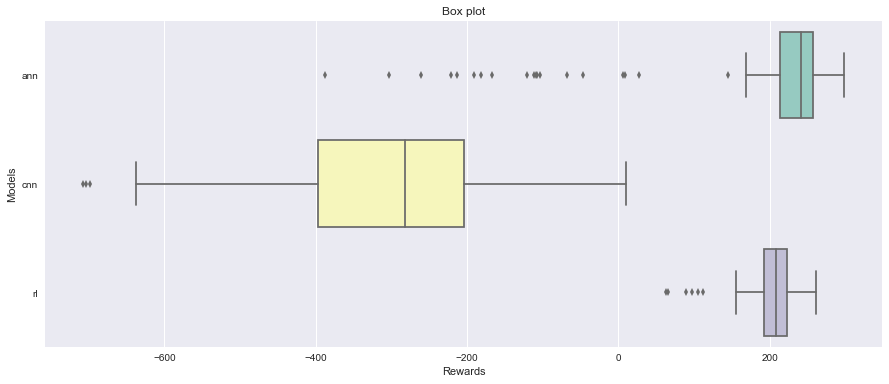

In [12]:
#plotting the box plot to see the reward distribution
plt.figure(figsize=(15,6))
plt.title("Box plot")
plt.xlabel("Rewards")
plt.ylabel("Models")
sns.boxplot(data=comparsion_df, palette="Set3",orient='h')
plt.show()

<b>Observations :</b>
<br><br>
As seen in previous visualizations, CNN has performed poorly, producing all negative rewards, whereas ANN and RL have produced equal positive mean reward. Apparently, ANN seems to be better than DQL-RL, since the above plot shows that the median reward of ANN is higher than that of RL. But too many outliers have shifted the mean reward of ANN to the left, making it equal to the mean reward obtained from RL. Hence, inspite of a higher median reward, ANN looses to DQL-RL due to the outliers.

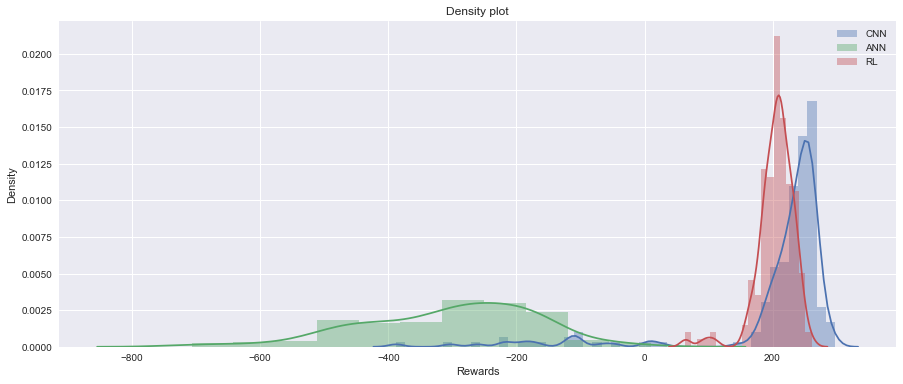

In [13]:
# Plotting the reward distributions of the three models
plt.figure(figsize=(15,6))
sns.distplot(reward_comparison['ann'])  
sns.distplot(reward_comparison['cnn'])
sns.distplot(reward_comparison['rl'])
plt.title("Density plot")
plt.xlabel("Rewards")
plt.ylabel("Density")
plt.legend(['CNN','ANN','RL'])
plt.show()

<b>Observations : </b><br>
<ul>
<li>CNN has produced the least mean reward with a very high deviation from the mean which is not desirable.</li>
<li>ANN has produced a higher mean reward than CNN, but with a high standard deviation, making it unstable. </li>
<li>Mean reward of RL is almost same as that of ANN, but with the lowest standard deviation, making it a clear winner.</li>
</ul>

Thus, we can conclude that DeepQLearning based on RL gives the best performance for Lunar Lander in terms of rewards obtained over 200 episodes.

## Compare the computational time for training each model

The approximate time taken to train the three models are as follows:

|Name|Time|
|:--|-------------------------------|
|ANN |113.6 seconds|
|CNN |455.2 seconds|
|DQL-RL |around 5 hours|

Although ANN has taken very less time to train, it gives good results in the form of positive rewards with some amount of fluctuations here and there. On the other hand, even after being trained for a long time, CNN has failed to perform giving all negative rewards. DQL-RL has taken the maximum time to train and this has resulted in very good results in form of a stable model with minimum fluctuations in the rewards obtained. <br/>

Let us discuss some points which are related to the computational time.
<ul><li>
The computational time is related to the complexity of the model to some extent. The ANN model consists of two hidden layers. The CNN model consists of three Convolutional-Max Pooling layers followed one hidden dense layer, making it more complex than ANN, hence the time to train this model is more than that of ANN. DQL-RL has the most complex model, with three hidden layers in the DeepQNeuralNet, consisting of 512 units in the first layer, 256 units in the second and 128 units in the third. This increases the number of weights to be trained, thereby increasing the training time. Also, it took around 1.5 million steps to train the RL model to work properly, to achieve the present stability. <br/></li>

<li>The computational time also depends upon the input data type and the size of the data. As for ANN and DQL we used state vectors, ANN having a simpler architecture took less time to train than RL. For CNN we used compressed version of raw images of different states and for computational constraints we could use maximum of 50% data, thereby loosing quite a lot of information. This made training the CNN model quite hard.

## Conclusions

In this assignment, we have performed four tasks as discussed below : <br>
<ul>
<li><b>Task 1 </b>- In this task, we trained three supervised machine learning models (SuperLearner classifier, Random Forest classifier and an ANN) to control the Lunar Lander craft based on high-level state representations. We used the entire dataset for this task, which was split into training and test sets. Based on the performance on the test set, we chose ANN as our state based player model.</li>
<li><b>Task 2 </b>- In this task, we trained two CNN models with different configurations to control the Lunar Lander craft based on image dataset. Due to computational contraints we managed to use only 50% of the entire image dataset which was further compressed before splitting into training and test sets. We chose the second CNN model as our image based player model, since it performed better the first one on the test set.</li>
<li><b>Task 3 </b>- In this task, we used a DeepQlearning based on Reinforcement Learning methodology to train an agent to play Lunar Lander. We built a deep neural network to determine the values of state-action pairs.</li>
<li><b>Task 4 </b>- In this final task, we deployed each of three selected models to the Lunar Lander game and made each of them play 200 episodes, at the end of which we collected the rewards obtained per model.</li>
</ul>
<br>
Analysis of the results of Task 4 can be combined as follows :<br>
<ul>
<li>Using half of the entire raw image dataset and compressing each image resulted in a good amount of information loss, making a considerably deep CNN model hard to train. This is reflected in the performance of the model as well. The prediction made by CNN is around 47% correct which is very low with respect to the other two models. CNN took long time to train, and couldn't perform well, producing all negative rewards over the 200 episodes.</li>
<li>ANN proved to be a better model for Lunar Lander. The neural network wasn't that deep, consisting of only two hidden layers with 8 units in each layer. Also, it didn't take much time to train the model. With a simple architecture ANN is able to produce mostly positive rewards. But there were some negative rewards in between, making the ANN model unstable, and hence not preferable for Lunar Lander.</li>
<li>RL model based on deep learning proved to be the best model for Lunar Lander. After training for almost 5 hours on the entire dataset of state vector representations, the RL model produced stable positive rewards.</li>
</ul>
<br>
Scope for improvement :<br>
<ul><li>We can try to improve the performance of CNN by using the entire image dataset. Moreover, using stacking of consecutive images to help predict a state based on the context can be useful in improving the performance of CNN.</li>
<li>We can use image dataset for RL and apply similar stacking of consecutive images.</li>
<li> Grid Search can be performed to determine the best hyper parameters when bulding a model.</li>
<li>Different network architectures can be tried and tested to attain better results.</li>
</ul>
